# Data Wrangling
The database I will be working on was made, by another data science student named Chuan Sun from the New York Data Science Academy. His finished database has 28 features including the movie title, budget, gross box office among others.
However, the database has three important flaws: it has some null values for gross box office(which I am trying to predict), inflation is not taken into account (so movies from earlier years will seem less succesful) and it does not take account the difference in currencies (so a US dollar will have the same value as a Japanese yen).

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('movie_metadata.csv')
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df = df[pd.notnull(df['gross'])]

In [4]:
df=df.dropna()

Here I dropped the rows which had a null value for box office as they would not help my model

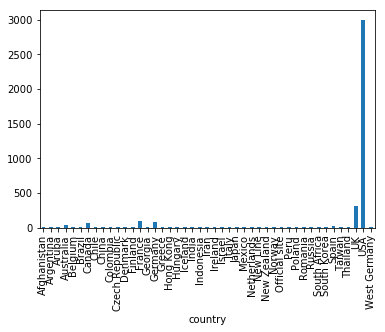

In [5]:
df[['gross','country']].groupby('country').size().plot('bar')
#While the plot does not look nicely it gives us a sense that most movies belong to one country


In [6]:
df[['movie_title','title_year']].groupby('title_year').count().sort_values('movie_title',ascending=False).head(10)

,movie_title
title_year,
2002.0,190
2006.0,189
2009.0,182
2008.0,182
2005.0,182
2004.0,181
2001.0,179
2011.0,168
2010.0,168


Becsause a signficant amount of the movies are not from the US I will not be able to just drop the countries, instead I will use the python package: easymoney, to adjust for inflation and to adjust for the different currencies

In [8]:
from easymoney.money import EasyPeasy
ep = EasyPeasy()
ep.normalize(amount=100, region="France", from_year=2010, to_year="latest", base_currency="USD")

124.81

In [ ]:
len(df)

In [9]:
normalize_gross=[]
drop_index=[]
normalize_budget=[]
for items in range(len(df)):
    try:
        normalized_item=ep.normalize(amount=df['gross'][items], region=df['country'][items], from_year=df['title_year'][items], to_year="latest", base_currency="USD")
        normalized_item2=ep.normalize(amount=df['budget'][items], region=df['country'][items], from_year=df['title_year'][items], to_year="latest", base_currency="USD")
        normalize_gross.append(normalized_item)
        normalize_budget.append(normalized_item2)
    except: 
        drop_index.append(items)



/home/juan/anaconda2/lib/python2.7/site-packages/easymoney/money.py:213: UserWarning: 
Inflation (CPI) data for 1940.0 in 'United States' could not be obtained from the
International Monetary Fund database currently cached.
Falling back to 1960.
  warn(warn_msg % (year, natural_region_name, str(fall_back_year)))
/home/juan/anaconda2/lib/python2.7/site-packages/easymoney/money.py:213: UserWarning: 
Inflation (CPI) data for 1927.0 in 'Germany' could not be obtained from the
International Monetary Fund database currently cached.
Falling back to 1960.
  warn(warn_msg % (year, natural_region_name, str(fall_back_year)))
/home/juan/anaconda2/lib/python2.7/site-packages/easymoney/money.py:213: UserWarning: 
Inflation (CPI) data for 1946.0 in 'United States' could not be obtained from the
International Monetary Fund database currently cached.
Falling back to 1960.
  warn(warn_msg % (year, natural_region_name, str(fall_back_year)))
/home/juan/anaconda2/lib/python2.7/site-packages/easymoney/money

In [11]:
df=df.drop(df.index[drop_index])

In [ ]:
len(normalize_gross), len(df)

In [12]:
df['gross']=normalize_gross
df['budget']=normalize_budget

As you can see I normalized gross into the current year and into USA dollars; however, because some of the rows had a combination of year and countries that were not avaible to the CPI index that 'easy money' stems from, I had to drop those rows from my dataframe leaving me 3305 rows to work with

Finally I will seperate the data into test and training in order to prevent myself from overfitting the data in my model and inferential statistics

In [13]:
df.to_csv('final_data')

In [14]:
train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

In [17]:
test.to_csv('test_data')
train.to_csv('train_data')
validate.to_csv('validate_data')
